# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Yo!
### The shortcut for H3 doesn't work in Juypter for VS Code when combined with html codes - wierd!

<h1>Yo!</h1>
### doesn't work now idk

<img src="assets/bricks.jpg">

# Import Statements

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [138]:
df = pd.read_csv('data/colors.csv')

In [139]:
df_group = df.groupby('is_trans').count()
df_group

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [140]:
color = pd.read_csv('data/colors.csv')

In [141]:
color_group = color.groupby('is_trans').count()
color_group

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [142]:
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [203]:
df.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [202]:
df[-5:]

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [144]:
df.shape

(135, 4)

In [145]:
df.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

In [146]:
df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [147]:
#counts true and false
df['is_trans'].value_counts()


is_trans
f    107
t     28
Name: count, dtype: int64

In [148]:
df_bool = (df == 't')
df_bool.tail()

,id,name,rgb,is_trans
130,False,False,False,True
131,False,False,False,True
132,False,False,False,True
133,False,False,False,False
134,False,False,False,False


In [149]:
df_bool.value_counts()

id     name   rgb    is_trans
False  False  False  False       107
                     True         28
Name: count, dtype: int64

In [150]:
df_bool.values.sum()

28

In [151]:
~df_bool.values.sum()

-29

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Understanding LEGO Themes vs. LEGO sets

<img src="assets/lego_themes.png">

<img src="assets/lego_sets.png">

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [152]:
df_sets = pd.read_csv("data/sets.csv")

In [153]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [154]:
df_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [155]:
set_sort = df_sets.sort_values("year")
set_sort.head(10)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


In [156]:
df_sets['year'].idxmin()

9521

In [157]:
df_sets.loc[9521]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [158]:
df_sets[df_sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [159]:
set_parts = df_sets.sort_values('num_parts', ascending=False)
set_parts.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [160]:
sets_grp = df_sets.groupby('year').count()
sets_grp.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [161]:
sets_grp['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [162]:
df_sets[df_sets['year'] == 1955].head()

,set_num,name,year,theme_id,num_parts
872,1200-1,"LEGO Town Plan Board, Large Plastic",1955,372,1
889,1210-2,Small Store Set,1955,372,30
892,1211-2,Small House Set,1955,372,19
894,1212-2,Small House - Left Set,1955,372,21
896,1213-2,Small House - Right Set,1955,372,23


In [163]:
df_sets[df_sets['year'] == 1955].count()

set_num      28
name         28
year         28
theme_id     28
num_parts    28
dtype: int64

In [164]:
df_sets[df_sets['year'] == 2019].count()

set_num      840
name         840
year         840
theme_id     840
num_parts    840
dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

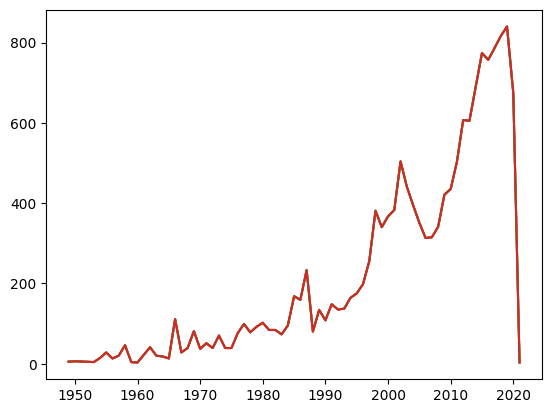

In [165]:
plt.plot(sets_grp)

In [166]:
new_sets = df_sets[df_sets['year'] <= 2019]
new_sets.sort_values('year', ascending=False).head()


,set_num,name,year,theme_id,num_parts
7291,52365-1,Sweet Mayhem Staticker,2019,501,0
9180,66587-1,City Police Bundle Building Kit,2019,61,0
14079,911952-1,Jedi Interceptor,2019,158,30
14080,911953-1,First Order SF TIE Fighter,2019,158,32
14081,911954-1,Kylo Ren's TIE Silencer,2019,158,33


In [167]:
sm_grp = new_sets.groupby('year').count()
sm_grp['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

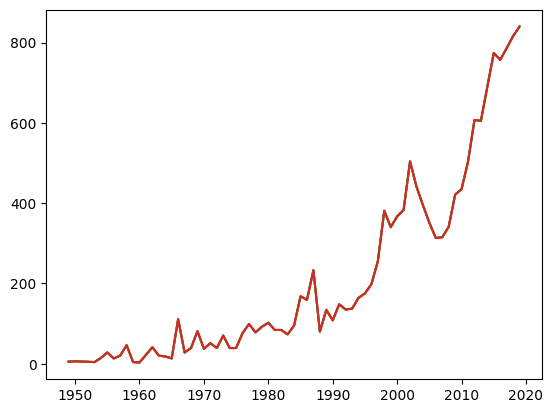

In [168]:
plt.plot(sm_grp)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [169]:
df_sets.sort_values('year').head(5)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [170]:
df_sets_sm = df_sets[df_sets['year'] <= 2019]
df_sets_sm.sort_values('year').tail()

,set_num,name,year,theme_id,num_parts
10486,71025-7,Jungle Explorer,2019,681,8
11632,76144-1,Avengers Hulk Helicopter Rescue,2019,702,477
11626,76139-1,1989 Batmobile,2019,698,3308
10461,71024-20,Disney Series 2 - Sealed Box,2019,677,0
8569,6315023-1,Windmill,2019,408,126


In [171]:
theme_yr = df_sets_sm.groupby('year')['theme_id'].agg('nunique')
theme_yr2 = df_sets.groupby('year').agg({'theme_id' : pd.Series.nunique})

In [172]:
theme_yr2.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


In [173]:
theme_yr.tail()

year
2015    98
2016    92
2017    89
2018    93
2019    78
Name: theme_id, dtype: int64

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

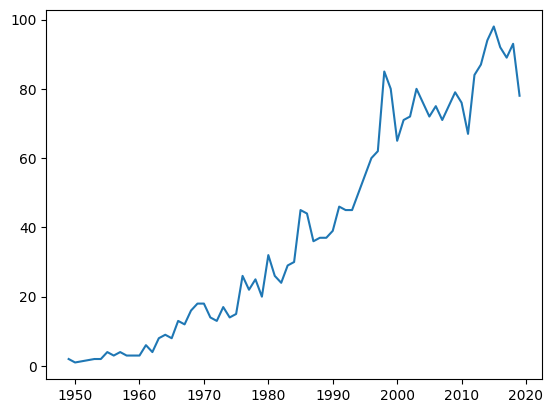

In [174]:
plt.plot(theme_yr)

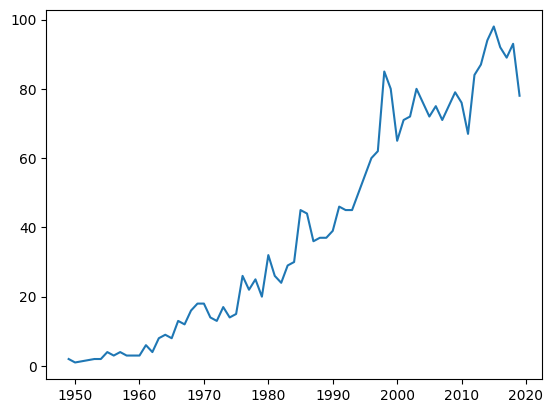

In [175]:
plt.plot(theme_yr2.index[:-2], theme_yr2.theme_id[:-2])

In [176]:
#df_sets.head()
#sm_grp.tail()
sets_grp.tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


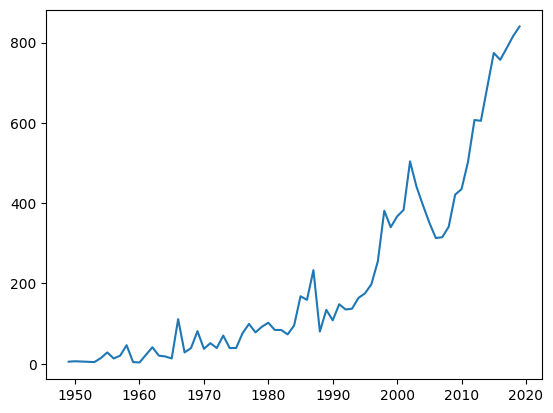

In [177]:
plt.plot(sets_grp.index[:-2], sets_grp.set_num[:-2])

### Line Charts with Two Seperate Axes

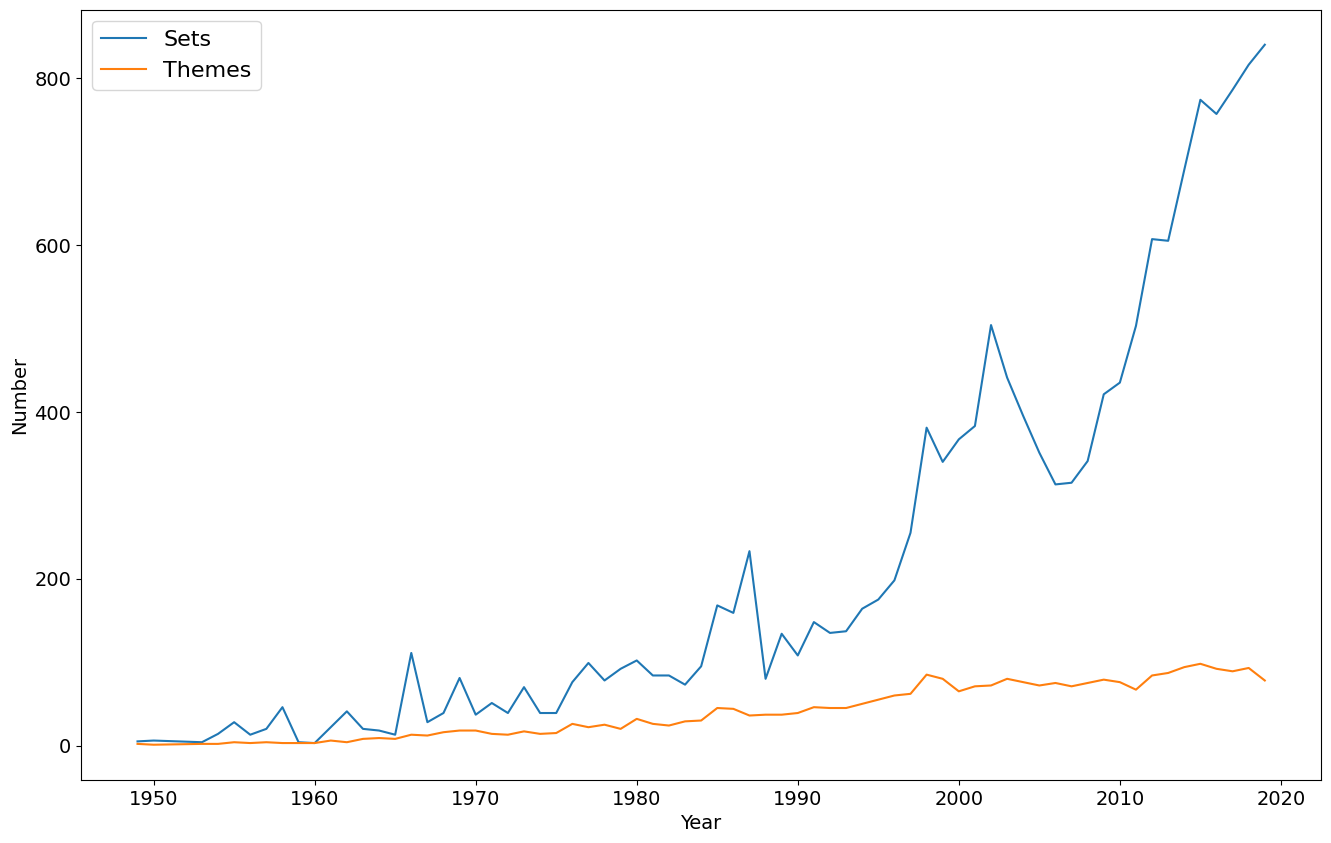

In [178]:


plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.plot(sm_grp['set_num'], label='Sets')
plt.plot(theme_yr, label= 'Themes')
  
plt.legend(fontsize=16)

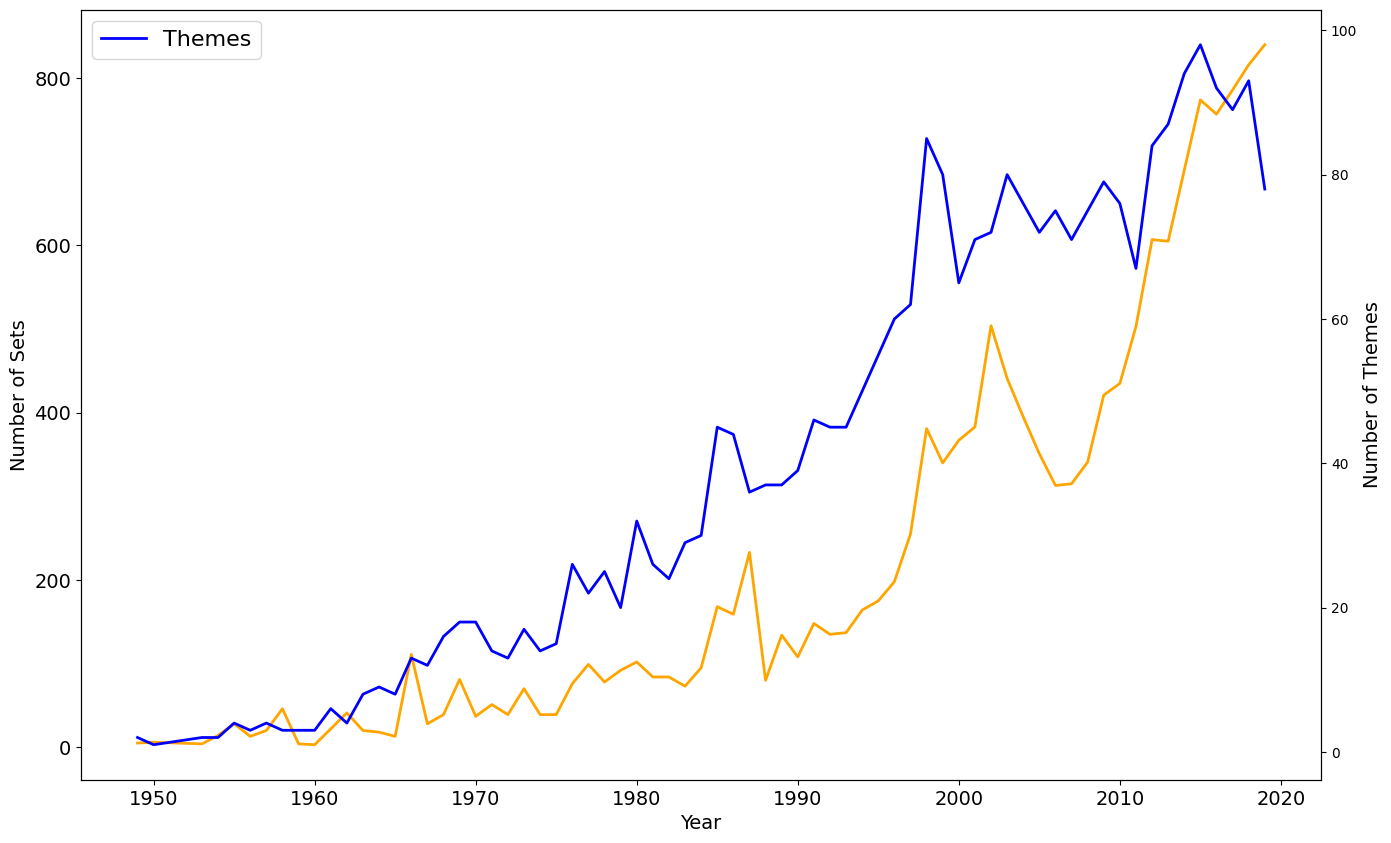

In [179]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sm_grp['set_num'], label='Sets', color="orange", linewidth=2)
ax2.plot(theme_yr, label='Themes', color="blue", linewidth=2)
ax1.set_ylabel('Number of Sets', fontsize=14)
ax2.set_ylabel('Number of Themes', fontsize=14) 
plt.legend(fontsize=16)

#don't know why the legend doesn't work - legend not part of course work...

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [180]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [181]:
df_sets.sort_values('name').head(15)

,set_num,name,year,theme_id,num_parts
10207,71010-7,Spectre,2015,552,7
10098,71004-13,'Where Are My Pants?' Guy,2014,549,6
2620,2817-1,(Me and My) Birthday,1998,652,30
2346,2553-1,(Patty's) Pony Stable,1993,652,27
6547,5003565-1,1 stud Blue Storage Brick,2014,501,0
6548,5003566-1,1 stud Red Storage Brick,2014,501,0
2102,222-2,1 x 1 Bricks,1958,371,240
927,1221-2,1 x 1 Bricks,1955,371,160
6265,488-1,1 x 1 Bricks with Letters (System),1966,371,44
6258,487-2,1 x 1 Bricks with Numbers (System),1966,371,44


In [182]:
#Option 1
#parts_per_set = df_sets.groupby('year')['num_parts'].agg('mean')

#Option 2
parts_per_set = df_sets.groupby('year').agg({'num_parts': pd.Series.mean})

parts_per_set.head()


,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [183]:
#OPTION 1 can't reman column - no name? 
#parts_per_set.rename({"num_parts":"parts_per_set"})

#OPTION2
new_parts = parts_per_set.rename(columns={"num_parts":"parts_per_set"})

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

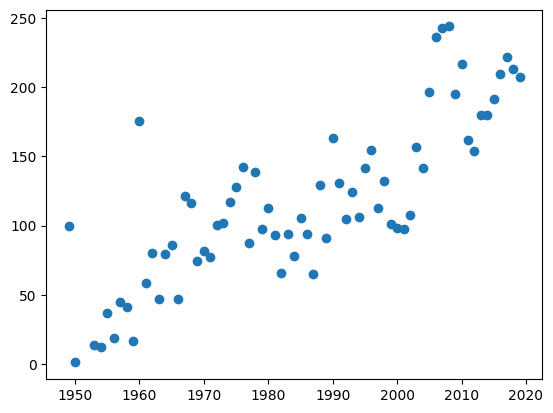

In [184]:
#plt.scatter(x=parts_per_set.index, y=parts_per_set['num_parts'])

#With column rename
plt.scatter(x=new_parts.index[:-2], y=new_parts['parts_per_set'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [185]:
df_sets.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [186]:
set_theme_count = df_sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [187]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_num':set_theme_count.values })
set_theme_count.head()

,id,set_num
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [188]:
sets_per_theme = df_sets.groupby('theme_id').agg({'set_num' : pd.Series.nunique})
#sets_per_theme.head()
sets = sets_per_theme.sort_values('set_num', ascending=False).head(5)
sets

,set_num
theme_id,
158,753
501,656
494,398
435,356
503,329


In [189]:
theme_df = pd.read_csv("data/themes.csv")

In [190]:
#theme with the most number of sets
theme_df[theme_df['id'] == 158]

,id,name,parent_id
150,158,Star Wars,NaN


In [192]:
theme_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [193]:
inner_joined = sets_per_theme.join(theme_df.set_index(["id"]),
...     on=["theme_id"],
...     how="inner",
...     lsuffix="_x",
...     rsuffix="_y",
... )
inner_joined.sort_values('set_num', ascending=False).head()

,set_num,name,parent_id
theme_id,,,
158,753,Star Wars,NaN
501,656,Gear,NaN
494,398,Friends,NaN
435,356,Ninjago,NaN
503,329,Key Chain,501.0


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='assets/rebrickable_schema.png'></img>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [142]:
theme_df = pd.read_csv("data/themes.csv")

In [143]:
theme_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [144]:
theme_df.shape

(596, 3)

In [145]:
theme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         596 non-null    int64  
 1   name       596 non-null    object 
 2   parent_id  464 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.1+ KB


In [127]:
new_sets = pd.read_csv("data/sets.csv")

In [128]:
new_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


In [130]:
set_theme_count = new_sets['theme_id'].value_counts()
set_theme_count[:5]


theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [131]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_num':set_theme_count.values })
set_theme_count.head()

,id,set_num
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


### Merging (i.e., Combining) DataFrames based on a Key


In [194]:
inner_merged = pd.merge(set_theme_count, theme_df, on='id')
inner_merged.head()

,id,set_num,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

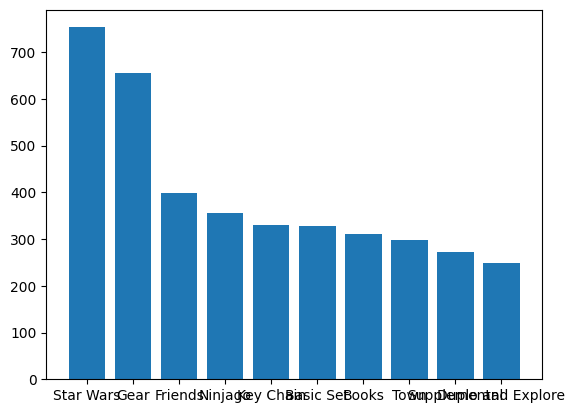

In [197]:
plt.bar(inner_merged.name[:10], inner_merged.set_num[:10])

<BarContainer object of 10 artists>

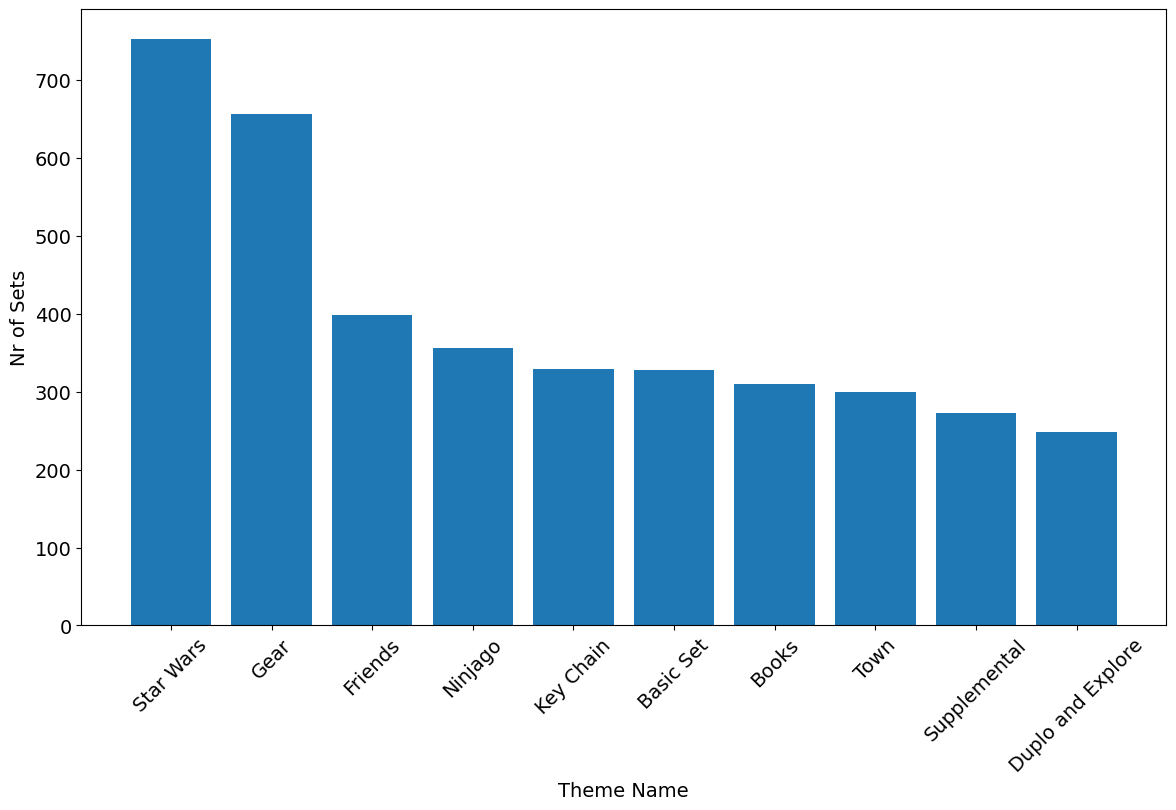

In [198]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(inner_merged.name[:10], inner_merged.set_num[:10])